In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [28]:
maxrapsodo = pd.read_csv('maxrapsodo.csv')
allgeyerrap = pd.read_csv('rapsodonew.csv')
allgeyertm = pd.read_csv('allgeyertm.csv')

In [29]:
allgeyerrap = allgeyerrap.round(1)
allgeyerrap = allgeyerrap.sort_values(by=['Date'])
allgeyerrap = allgeyerrap.rename(columns={"Pitch Type": "PitchType1"})
allgeyerrap

,No,Pitch ID,Date,PitchType1,Is Strike,Strike Zone Side,Strike Zone Height,Speed,Spin,Spin Efficiency (SZ),Spin Axis,VB,HB,Release Height,Release Side,Gyro Degree (deg)
0,1,1639585327,Wed Dec 15 2021 4:22:07 PM,ChangeUp,Y,-2.3,23.2,78.4,2113.1,99.9,9:28,5.6,-21.0,4.6,-2.5,10.5
1,2,1639585350,Wed Dec 15 2021 4:22:30 PM,ChangeUp,N,9.9,43.7,76.4,2448.5,44.3,4:28,-5.5,6.8,4.4,-3.0,-69.3
2,3,1639585370,Wed Dec 15 2021 4:22:50 PM,ChangeUp,Y,1.0,38.8,77.2,2514.8,42.9,4:16,-5.1,7.7,4.6,-2.9,-69.7
3,5,1639585435,Wed Dec 15 2021 4:23:08 PM,Slider,N,-15.6,49.5,76.4,2449.0,38.1,3:32,-1.6,7.5,4.6,-2.8,-74.1
4,6,1639585455,Wed Dec 15 2021 4:23:55 PM,Slider,Y,-6.1,38.4,74.6,2592.4,96.1,1:14,19.4,14.7,4.6,-2.8,7.4
5,7,1639585478,Wed Dec 15 2021 4:24:15 PM,Slider,Y,2.6,33.1,76.5,2611.1,45.7,4:26,-6.1,7.9,4.6,-2.9,-68.0
6,8,1639585502,Wed Dec 15 2021 4:24:38 PM,Cutter,N,-10.5,14.6,81.3,2518.3,12.2,11:0,1.1,0.3,4.7,-2.6,-86.9
7,9,1639585523,Wed Dec 15 2021 4:25:02 PM,Cutter,N,-9.3,53.3,82.4,2462.0,12.2,11:32,1.6,0.5,4.7,-2.7,-86.1
8,10,1639585542,Wed Dec 15 2021 4:25:23 PM,Cutter,N,5.6,5.0,82.9,2497.9,20.2,11:50,1.5,0.7,4.5,-2.6,-86.2
9,11,1639585578,Wed Dec 15 2021 4:25:42 PM,Cutter,Y,-0.8,28.5,80.2,2517.6,11.0,10:18,0.7,0.2,4.8,-2.4,-87.7


In [30]:
allgeyertm = allgeyertm.sort_values(by=['Pitch Time'])
allgeyertm = allgeyertm.drop([8,2])
allgeyertm

,tilt_normed_vert,tilt_normed_horz,Pitch Type,Tilt,Pitcher Name,Pitch Time,Release Speed (mph),Spin Rate (rpm),Release Height (ft),Release Side (ft),Extension (ft),Induced Vertical Break (in),Horizontal Break (in),Vertical Approach Angle (°),Horizontal Approach Angle (°),Location Height (ft),Location Side (ft),Zone Location
4,7.7,27.5,Slider,2:30,Nick Allgeyer,12/15/21 10:22,75.9,2474.0,5.3,-3.4,5.7,3.1,11.2,-6.4,6.1,3.6,1.3,Out of Zone
5,8.4,27.2,Slider,2:30,Nick Allgeyer,12/15/21 10:22,77.0,2512.0,5.2,-3.5,5.7,3.2,10.4,-6.8,5.4,3.0,0.6,Inner Zone
6,9.1,-27.0,Slider,9:45,Nick Allgeyer,12/15/21 10:22,78.3,2108.0,5.3,-3.1,6.0,6.8,-20.0,-7.3,1.6,2.2,0.2,Inner Zone
0,-6.9,27.7,Slider,3:30,Nick Allgeyer,12/15/21 10:23,75.8,2603.0,5.3,-3.6,4.8,-4.5,18.3,-9.2,5.4,1.7,-0.1,Inner Zone
10,17.6,22.4,Slider,1:45,Nick Allgeyer,12/15/21 10:23,76.3,2423.0,5.3,-3.5,5.3,10.1,12.8,-5.1,4.0,4.2,-0.9,Out of Zone
1,2.8,28.4,Slider,2:45,Nick Allgeyer,12/15/21 10:24,76.7,2587.0,5.1,-3.7,NaN,1.7,17.4,-7.4,6.1,2.7,0.7,Inner Zone
3,6.5,27.8,Slider,2:30,Nick Allgeyer,12/15/21 10:24,74.4,2581.0,5.3,-3.5,5.4,4.7,20.0,-6.6,5.5,3.5,-0.3,Inner Zone
11,18.9,21.3,Cutter,1:30,Nick Allgeyer,12/15/21 10:25,81.2,2491.0,5.3,-3.3,5.6,3.5,3.9,-7.9,3.2,1.4,-0.7,Out of Zone
12,19.8,20.5,Cutter,1:30,Nick Allgeyer,12/15/21 10:25,82.4,2468.0,5.4,-3.4,5.4,3.0,3.1,-7.1,4.2,2.1,0.2,Inner Zone
13,28.4,2.0,Cutter,NaN,Nick Allgeyer,12/15/21 10:25,82.3,NaN,5.3,-3.4,5.3,1.8,0.1,-5.0,3.1,4.3,-0.5,Out of Zone


In [31]:
combine = allgeyertm.join(allgeyerrap)
combine = combine.drop(columns=['Pitcher Name','Pitch Time','Pitch ID','Horizontal Approach Angle (°)','Zone Location','No','Strike Zone Side','Is Strike','Strike Zone Height','tilt_normed_vert','tilt_normed_horz','Gyro Degree (deg)',
                               'Spin Efficiency (SZ)','Spin Rate (rpm)','Release Height','Release Side'])

In [32]:
#combine = combine.drop(columns=['Pitcher Name','Pitch Time','Pitch ID','Horizontal Approach Angle (°)',
#                     'Zone Location','No','Strike Zone Side','Is Strike','Strike Zone Height','tilt_normed_vert',
#                               'tilt_normed_horz','Gyro Degree (deg)'])
combine.columns

Index(['Pitch Type', 'Tilt', 'Release Speed (mph)', 'Release Height (ft)',
       'Release Side (ft)', 'Extension (ft)', 'Induced Vertical Break (in)',
       'Horizontal Break (in)', 'Vertical Approach Angle (°)',
       'Location Height (ft)', 'Location Side (ft)', 'Date', 'PitchType1',
       'Speed', 'Spin', 'Spin Axis', 'VB', 'HB'],
      dtype='object')

In [33]:
#combine['Tilt'] = pd.to_datetime(combine['Tilt'], format='%H:%M:%S').dt.strftime('%M:%S')
combine["Tilt"] = combine["Tilt"].str.replace(":","")
combine["Spin Axis"] = combine["Spin Axis"].str.replace(":","")
combine["Spin Axis"] = combine["Spin Axis"].astype(float)
combine["Tilt"] = combine["Tilt"].astype(float)
combine = combine.sort_values(["Date", "Release Speed (mph)",'Speed','VB','Induced Vertical Break (in)'], 
                              ascending = (True, True, True, True, True))
combine

,Pitch Type,Tilt,Release Speed (mph),Release Height (ft),Release Side (ft),Extension (ft),Induced Vertical Break (in),Horizontal Break (in),Vertical Approach Angle (°),Location Height (ft),Location Side (ft),Date,PitchType1,Speed,Spin,Spin Axis,VB,HB
0,Slider,330.0,75.8,5.3,-3.6,4.8,-4.5,18.3,-9.2,1.7,-0.1,Wed Dec 15 2021 4:22:07 PM,ChangeUp,78.4,2113.1,928.0,5.6,-21.0
1,Slider,245.0,76.7,5.1,-3.7,NaN,1.7,17.4,-7.4,2.7,0.7,Wed Dec 15 2021 4:22:30 PM,ChangeUp,76.4,2448.5,428.0,-5.5,6.8
3,Slider,230.0,74.4,5.3,-3.5,5.4,4.7,20.0,-6.6,3.5,-0.3,Wed Dec 15 2021 4:23:08 PM,Slider,76.4,2449.0,332.0,-1.6,7.5
4,Slider,230.0,75.9,5.3,-3.4,5.7,3.1,11.2,-6.4,3.6,1.3,Wed Dec 15 2021 4:23:55 PM,Slider,74.6,2592.4,114.0,19.4,14.7
5,Slider,230.0,77.0,5.2,-3.5,5.7,3.2,10.4,-6.8,3.0,0.6,Wed Dec 15 2021 4:24:15 PM,Slider,76.5,2611.1,426.0,-6.1,7.9
6,Slider,945.0,78.3,5.3,-3.1,6.0,6.8,-20.0,-7.3,2.2,0.2,Wed Dec 15 2021 4:24:38 PM,Cutter,81.3,2518.3,110.0,1.1,0.3
7,Cutter,NaN,80.8,5.4,-3.2,5.6,1.2,3.3,-7.0,2.6,0.7,Wed Dec 15 2021 4:25:02 PM,Cutter,82.4,2462.0,1132.0,1.6,0.5
9,Cutter,145.0,80.1,5.4,-3.1,5.5,1.9,2.7,-7.1,2.6,0.3,Wed Dec 15 2021 4:25:42 PM,Cutter,80.2,2517.6,1018.0,0.7,0.2
10,Slider,145.0,76.3,5.3,-3.5,5.3,10.1,12.8,-5.1,4.2,-0.9,Wed Dec 15 2021 4:26:18 PM,Cutter,80.9,2593.3,1020.0,0.8,0.1
11,Cutter,130.0,81.2,5.3,-3.3,5.6,3.5,3.9,-7.9,1.4,-0.7,Wed Dec 15 2021 4:26:48 PM,Cutter,80.3,2592.2,34.0,0.7,1.2


In [160]:
combine['axisdev'] = np.subtract(combine['Spin Axis'], combine['Tilt'])

In [3]:
df = pd.read_csv('sample.csv')
df

,No,Pitch Type,Speed,Spin,Spin Efficiency,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,Tilt,VB,HB,Gyro Deg,Spin Axis
0,13,Sinker,87.2,2295,98.9,5.1,2.40,5.6,11.9,18.4,1:45,12.0,17.0,-5,1:50
1,12,Sinker,86.5,2200,99.0,5.2,2.42,5.6,11.0,19.3,2:00,11.5,18.5,-3,1:49
2,11,Sinker,86.7,2250,98.4,5.2,2.30,5.5,10.0,18.6,2:15,9.0,19.4,-2,1:55
3,10,Sinker,86.5,2264,97.4,5.1,2.50,5.6,10.5,19.3,2:00,10.7,18.3,-1,2:00
4,9,ChangeUp,78.1,2000,100.0,5.0,2.30,5.2,1.0,22.1,3:00,-3.0,19.0,-11,3:03
5,8,ChangeUp,80.0,1950,99.0,5.0,2.60,5.2,0.0,25.0,3:15,-4.0,21.0,-10,3:05
6,7,ChangeUp,79.2,1925,98.5,5.0,3.00,5.3,-3.0,21.5,3:15,-5.0,20.4,-5,3:10
7,6,ChangeUp,79.2,1954,99.5,5.0,2.50,5.3,-2.3,20.6,3:15,-3.5,20.3,-15,3:15
8,5,Slider,76.3,2408,50.0,5.3,2.10,5.8,-8.4,-17.8,7:45,-10.0,-11.0,54,8:15
9,3,Slider,77.5,2359,45.3,5.2,2.20,5.9,-9.4,-14.2,7:30,-11.0,-11.5,43,8:00


In [4]:
df["Spin Axis"] = df["Spin Axis"].str.replace(":","")
df["Tilt"] = df["Tilt"].str.replace(":","")
df["Spin Axis"] = df["Spin Axis"].astype(int)
df["Tilt"] = df["Tilt"].astype(int)
grouped = df.groupby(df['Pitch Type'])
sinker = grouped.get_group("Sinker")
changeup = grouped.get_group("ChangeUp")
slider = grouped.get_group("Slider")

In [5]:
sinker['axisdev'] = np.subtract(sinker['Tilt'], sinker['Spin Axis'])
slider['axisdev'] = np.subtract(slider['Tilt'], slider['Spin Axis'])
changeup['axisdev'] = np.subtract(changeup['Tilt'], changeup['Spin Axis'])
sinker['hbdiff'] = np.subtract(sinker['Horizontal Break'], sinker['HB'])
slider['hbdiff'] = np.subtract(slider['Horizontal Break'], slider['HB'])
changeup['hbdiff'] = np.subtract(changeup['Horizontal Break'], changeup['HB'])
sinker['vbdiff'] = np.subtract(sinker['Induced Vertical Break'], sinker['VB'])
slider['vbdiff'] = np.subtract(slider['Induced Vertical Break'], slider['VB'])
changeup['vbdiff'] = np.subtract(changeup['Induced Vertical Break'], changeup['VB'])

C:\Users\henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [6]:
sinker = sinker.drop(columns=['Pitch Type'])
changeup = changeup.drop(columns=['Pitch Type'])
slider = slider.drop(columns=['Pitch Type'])
sinkerz = sinker.apply(stats.zscore)
changeupz = changeup.apply(stats.zscore)
sliderz = slider.apply(stats.zscore)

In [7]:
sinkerheight = sinkerz["Release Height"][1]
sinkerside = sinkerz['Release Side'][1]
sinkerdev = sinkerz['axisdev'][1]
sinkerhb = sinkerz['hbdiff'][1]
sinkervb = sinkerz['vbdiff'][1]
sinkervelo = sinker['Speed'].mean()

In [8]:
value = (sinkervelo*.37) +(sinkervb*.05) + (sinkerhb*.25) + (sinkerdev*.1) + (sinkerside*.11) + (sinkerheight*.12)
value

32.326573095534506

In [9]:
def stuff(df):
    for i in range(len(df)):
        value = (df['Speed'][i]*.37) +(df['vbdiff'][i]*.05) + (df['hbdiff'][i]*.25) + (df['axisdev'][i]*.1) + (df['Release Side'][i]*.11) + (df['Release Height'][i]*.12)
        #df['Value'] = ''
        df['Value'][i] = value
stuff(sinkerz)

KeyError: 'Value'

In [ ]:
#sinkerz['Value'] = MinMaxScaler().fit_transform(np.array(sinkerz['Value']).reshape(-1,1))

In [12]:
sinkerz

,No,Speed,Spin,Spin Efficiency,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,Tilt,VB,HB,Gyro Deg,Spin Axis,axisdev,hbdiff,vbdiff,Value
0,1.341641,1.660038,1.247046,0.749287,-1.0,-0.070186,0.577350,1.496188,-1.230915,-1.685854,1.054499,-1.516351,-1.521278,-0.636927,-1.077750,0.956183,-0.264135,0.604557
1,0.447214,-0.786334,-1.524168,0.907031,1.0,0.210559,0.577350,0.213741,0.984732,0.374634,0.615125,0.233285,-0.169031,-0.684107,0.838250,0.239046,-0.968496,-0.0526204
2,-0.447214,-0.087370,-0.065634,-0.039436,1.0,-1.473911,-1.732051,-1.211200,-0.738549,0.936586,-1.581749,1.283066,0.507093,-0.401028,1.146179,-1.673320,1.672857,-0.294527
3,-1.341641,-0.786334,0.342755,-1.616882,-1.0,1.333539,0.577350,-0.498729,0.984732,0.374634,-0.087875,0.000000,1.183216,1.722062,-0.906679,0.478091,-0.440225,-0.25741


In [10]:
full = pd.read_csv('full1.csv')
pitches = ['Sinker']
full = full[full['Pitch Type'].isin(pitches)]
full = full.dropna()
full = full.reset_index(drop=True)
full = full.drop(columns = ['tilt_normed_vert','tilt_normed_horz','Pitch Time','Zone Location','Location Height (ft)', 'Location Side (ft)',
                           'Pitch Type','Pitcher Name'])
full["Spin Axis"] = full["Spin Axis"].str.replace(":","")
full["Tilt"] = full["Tilt"].str.replace(":","")
full["Spin Axis"] = full["Spin Axis"].astype(int)
full["Tilt"] = full["Tilt"].astype(int)
full['axisdev'] = np.subtract(full['Tilt'], full['Spin Axis'])
full['hbdiff'] = np.subtract(full['Horizontal Break'], full['HB'])
full['vbdiff'] = np.subtract(full['Induced Vertical Break'], full['VB'])
nfull = full.apply(stats.zscore)
nfull['Value'] = ''
stuff(nfull)
full

C:\Users\henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Tilt,Speed,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,Vertical Approach Angle (°),Horizontal Approach Angle (°),HB,VB,Spin Axis,axisdev,hbdiff,vbdiff
0,945,85.9,2096.0,5.1,-2.8,5.3,6.9,-15.8,-7.7,0.6,-16.0,5.0,1000,-55,0.2,1.9
1,945,84.8,2009.0,5.2,-2.7,5.2,7.2,-15.2,-7.4,0.2,-16.0,6.0,1000,-55,0.8,1.2
2,1000,86.7,2114.0,5.1,-2.7,5.4,7.5,-14.8,-6.2,0.5,-16.0,6.0,1015,-15,1.2,1.5
3,200,86.5,2180.0,6.5,2.1,6.7,6.8,13.4,-8.2,0.1,16.0,6.0,130,70,-2.6,0.8
4,1000,84.9,2131.0,5.2,-2.9,5.0,7.9,-15.3,-5.8,-1.3,-16.0,7.0,1100,-100,0.7,0.9
5,1000,86.0,2137.0,5.2,-2.9,5.0,8.8,-15.7,-5.8,-1.6,-16.0,6.0,1100,-100,0.3,2.8
6,1000,87.1,2104.0,5.0,-2.7,5.3,9.5,-14.9,-6.4,-0.4,-16.0,7.0,1030,-30,1.1,2.5
7,1000,86.5,2098.0,5.1,-2.6,5.4,10.5,-15.9,-5.3,1.0,-16.0,9.0,1030,-30,0.1,1.5
8,145,71.3,1564.0,5.6,2.0,3.4,13.0,18.6,-8.6,0.4,20.0,10.0,100,45,-1.4,3.0
9,145,70.0,1528.0,5.5,1.8,3.7,13.8,19.2,-6.5,0.3,20.0,10.0,100,45,-0.8,3.8


In [11]:
scaler = MinMaxScaler(feature_range=(20,80))
nfull['Value'] = scaler.fit_transform(np.array(nfull['Value']).reshape(-1,1))
display(nfull)

,Tilt,Speed,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,Vertical Approach Angle (°),Horizontal Approach Angle (°),HB,VB,Spin Axis,axisdev,hbdiff,vbdiff,Value
0,0.677862,0.718593,0.693006,-0.910153,-1.074924,0.153019,-1.237652,-1.000893,-0.612388,0.950820,-0.946506,-1.489313,0.699385,-0.736215,0.368639,-4.573402e-01,54.674105
1,0.677862,0.555702,0.312555,-0.691255,-1.033497,0.045339,-1.165740,-0.962123,-0.453724,0.576404,-0.946506,-1.139968,0.699385,-0.736215,0.675390,-8.130493e-01,56.297953
2,0.804582,0.837060,0.771720,-0.910153,-1.033497,0.260700,-1.093827,-0.936276,0.180933,0.857216,-0.946506,-1.139968,0.730627,-0.027958,0.879891,-6.606026e-01,67.731487
3,-1.038620,0.807443,1.060339,2.154412,0.955003,1.660543,-1.261623,0.885942,-0.876829,0.482800,0.921921,-1.139968,-1.112657,1.477089,-1.062865,-1.016312e+00,80.000000
4,0.804582,0.570510,0.846061,-0.691255,-1.116351,-0.170021,-0.997944,-0.968585,0.392485,-0.827657,-0.946506,-0.790623,0.907665,-1.533004,0.624265,-9.654961e-01,50.580444
5,0.804582,0.733401,0.872300,-0.691255,-1.116351,-0.170021,-0.782206,-0.994432,0.392485,-1.108469,-0.946506,-1.139968,0.907665,-1.533004,0.419765,2.256665e-16,53.745740
6,0.804582,0.896293,0.727990,-1.129050,-1.033497,0.153019,-0.614410,-0.942738,0.075157,0.014780,-0.946506,-0.790623,0.761869,-0.293554,0.828766,-1.524467e-01,66.723537
7,0.804582,0.807443,0.701752,-0.910153,-0.992070,0.260700,-0.374702,-1.007355,0.656926,1.325236,-0.946506,-0.091933,0.761869,-0.293554,0.317514,-6.606026e-01,58.164125
8,-1.165340,-1.443421,-1.633433,0.184335,0.913576,-1.892906,0.224569,1.221954,-1.088381,0.763612,1.155475,0.257412,-1.175142,1.034428,-0.449363,1.016312e-01,29.902795
9,-1.165340,-1.635929,-1.790861,-0.034563,0.830722,-1.569865,0.416336,1.260724,0.022269,0.670008,1.155475,0.257412,-1.175142,1.034428,-0.142612,5.081558e-01,29.373826


In [12]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
x = full['Horizontal Break']
y = full['Induced Vertical Break']
z = nfull['Value']
plt.tricontour(x, y, z, 15, linewidths=1.5, cmap='coolwarm')
plt.tricontourf(x, y, z, 15)
plt.ylabel('IVB')
plt.xlabel('HB')
plt.colorbar()
plt.grid()

In [7]:
sinkerzn = sinkerz.copy()
column = 'Value'
sinkerzn[column] = scaler.fit_transform(np.array(sinkerzn[column]).reshape(-1,1))
display(sinkerzn)

NameError: name 'sinkerz' is not defined

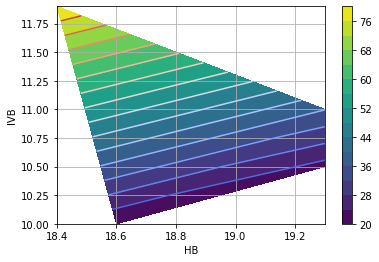

In [38]:
X = sinker['Horizontal Break']
Y = sinker['Induced Vertical Break']
Z = sinkerzn['Value']
plt.tricontour(X, Y, Z, 15, linewidths=1.5, cmap='coolwarm')
plt.tricontourf(X, Y, Z, 15)
plt.ylabel('IVB')
plt.xlabel('HB')
plt.colorbar()
plt.grid()

In [40]:
velo = input("Enter your velo: ")
velo = float(velo)
vbrap = input('Enter your vertical break on rapsodo: ')
vbrap = float(vbrap)
hbrap = input('Enter your horizontal break on rapsodo: ')
hbrap = float(hbrap)
vbtm  = input('Enter your vertical break on trackman: ')
vbtm = float(vbtm)
hbtm = input('Enter your horizontal break on trackman: ')
hbtm = float(hbtm)
tiltrap = input('Enter your tilt on rapsodo without the colon: ')
tiltrap = float(tiltrap)
tilttm = input('Enter your tilt on trackman without the colon: ')
tilttm = float(tiltrap)
relh = input('Enter your release height: ')
rels = input('Enter your release side: ')
relh = float(relh)
rels = float(rels)
vbdiff = vbrap - vbtm
hbdiff = hbrap - hbtm
tiltdiff = tilttm - tiltrap

Enter your velo: 87.1
Enter your vertical break on rapsodo: 11
Enter your horizontal break on rapsodo: 20
Enter your vertical break on trackman: 12
Enter your horizontal break on trackman: 21
Enter your tilt on rapsodo without the colon: 145
Enter your tilt on trackman without the colon: 215
Enter your release height: 5.1
Enter your release side: 2.2


In [56]:
newrow = {'Speed':velo,'Induced Vertical Break':vbtm,'Horizontal Break':hbtm,'HB':hbrap,'VB':vbrap,
          'Release Height':relh,'Release Side':rels,'vbdiff':vbdiff,'hbdiff':hbdiff,'axisdev':tiltdiff}
sinkerrow = sinker.append(newrow,ignore_index=True)
sinkerrowz = sinkerrow.apply(stats.zscore)

In [8]:
sinkerrowz['Value']= ''
stuff(sinkerrowz)
sinkerrowz['Value'] = scaler.fit_transform(np.array(sinkerrowz['Value']).reshape(-1,1))
display(sinkerrowz)

NameError: name 'sinkerrowz' is not defined

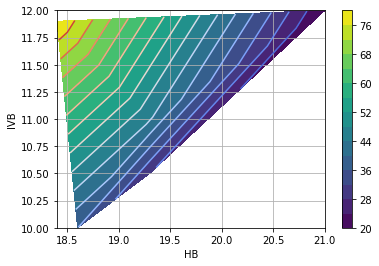

In [58]:
X = sinkerrow['Horizontal Break']
Y = sinkerrow['Induced Vertical Break']
Z = sinkerrowz['Value']
plt.tricontour(X, Y, Z, 15, linewidths=1.5, cmap='coolwarm')
plt.tricontourf(X, Y, Z, 15)
plt.ylabel('IVB')
plt.xlabel('HB')
plt.colorbar()
plt.grid()

In [45]:
snkvalue = (velo*.37) +(vbdiff*.05) + (hbdiff*.25) + (tiltdiff*.1) + (rels*.11) + (relh*.12)
snkvalue

32.858999999999995

In [48]:
snkz = (snkvalue - sinkerz.mean())/sinkerz.std()
snkz['Value']

78.82896774538126

In [13]:
def sinkerstuff():
    velo = input("Enter your velo: ")
    velo = float(velo)
    vbrap = input('Enter your vertical break on rapsodo: ')
    vbrap = float(vbrap)
    hbrap = input('Enter your horizontal break on rapsodo: ')
    hbrap = float(hbrap)
    vbtm  = input('Enter your vertical break on trackman: ')
    vbtm = float(vbtm)
    hbtm = input('Enter your horizontal break on trackman: ')
    hbtm = float(hbtm)
    tiltrap = input('Enter your tilt on rapsodo without the colon: ')
    tiltrap = float(tiltrap)
    tilttm = input('Enter your tilt on trackman without the colon: ')
    tilttm = float(tiltrap)
    relh = input('Enter your release height: ')
    rels = input('Enter your release side: ')
    relh = float(relh)
    rels = float(rels)
    vbdiff = vbrap - vbtm
    hbdiff = hbrap - hbtm
    tiltdiff = tilttm - tiltrap
    newrow = {'Speed':velo,'Induced Vertical Break':vbtm,'Horizontal Break':hbtm,'HB':hbrap,'VB':vbrap,
          'Release Height':relh,'Release Side':rels,'vbdiff':vbdiff,'hbdiff':hbdiff,'axisdev':tiltdiff}
    global full
    full = full.append(newrow,ignore_index=True)
    fullz = full.apply(stats.zscore)
    fullz['Value'] = ''
    stuff(fullz)
    fullz['Value'] = scaler.fit_transform(np.array(fullz['Value']).reshape(-1,1))
    X = full['Horizontal Break']
    Y = full['Induced Vertical Break']
    Z = fullz['Value']
    plt.tricontour(X, Y, Z, 15, linewidths=1.5, cmap='coolwarm')
    plt.tricontourf(X, Y, Z, 15, cmap = 'coolwarm')
    plt.ylabel('IVB')
    plt.xlabel('HB')
    plt.colorbar()
    plt.grid()
    print(fullz['Value'].iloc[-1])

Enter your velo: 92
Enter your vertical break on rapsodo: 12
Enter your horizontal break on rapsodo: 15
Enter your vertical break on trackman: 5
Enter your horizontal break on trackman: 20
Enter your tilt on rapsodo without the colon: 130
Enter your tilt on trackman without the colon: 245
Enter your release height: 5.6
Enter your release side: 2.2


C:\Users\henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


54.468980130288


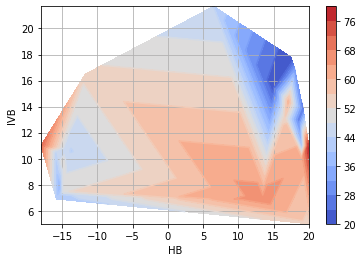

In [21]:
sinkerstuff()

In [20]:
full

,Tilt,Speed,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,Vertical Approach Angle (°),Horizontal Approach Angle (°),HB,VB,Spin Axis,axisdev,hbdiff,vbdiff
0,945.0,85.9,2096.0,5.1,-2.8,5.3,6.9,-15.8,-7.7,0.6,-16.0,5.0,1000.0,-55.0,0.2,1.9
1,945.0,84.8,2009.0,5.2,-2.7,5.2,7.2,-15.2,-7.4,0.2,-16.0,6.0,1000.0,-55.0,0.8,1.2
2,1000.0,86.7,2114.0,5.1,-2.7,5.4,7.5,-14.8,-6.2,0.5,-16.0,6.0,1015.0,-15.0,1.2,1.5
3,200.0,86.5,2180.0,6.5,2.1,6.7,6.8,13.4,-8.2,0.1,16.0,6.0,130.0,70.0,-2.6,0.8
4,1000.0,84.9,2131.0,5.2,-2.9,5.0,7.9,-15.3,-5.8,-1.3,-16.0,7.0,1100.0,-100.0,0.7,0.9
5,1000.0,86.0,2137.0,5.2,-2.9,5.0,8.8,-15.7,-5.8,-1.6,-16.0,6.0,1100.0,-100.0,0.3,2.8
6,1000.0,87.1,2104.0,5.0,-2.7,5.3,9.5,-14.9,-6.4,-0.4,-16.0,7.0,1030.0,-30.0,1.1,2.5
7,1000.0,86.5,2098.0,5.1,-2.6,5.4,10.5,-15.9,-5.3,1.0,-16.0,9.0,1030.0,-30.0,0.1,1.5
8,145.0,71.3,1564.0,5.6,2.0,3.4,13.0,18.6,-8.6,0.4,20.0,10.0,100.0,45.0,-1.4,3.0
9,145.0,70.0,1528.0,5.5,1.8,3.7,13.8,19.2,-6.5,0.3,20.0,10.0,100.0,45.0,-0.8,3.8
